<a href="https://colab.research.google.com/github/Jerry086/SALSA/blob/yaqi/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [68]:
metadata = pd.read_csv('/content/drive/MyDrive/NEU/audio_metadata.csv')
embeddings = pd.read_csv('/content/drive/MyDrive/NEU/audio_embeddings.csv')

# Merge the metadata and embeddings on 'video_id'
merged_df = pd.merge(metadata, embeddings, on='video_id')

In [98]:
# convert stringified lists to actual lists
exploded_df = merged_df.explode('labels')
exploded_df['labels'] = exploded_df['labels'].apply(eval)

# extract embeddings and labels, do it from the exploded_df
embeddings_matrix = exploded_df.iloc[:, 4:].values
labels = exploded_df['labels'].values
print(labels)

[list([367, 455, 490]) list([0, 72, 73, 81, 85]) list([0, 137, 436]) ...
 list([0, 480]) list([0, 449]) list([155, 157])]


In [99]:
# standardize the features to prepare them for PCA
scaler = StandardScaler()
embeddings_matrix_scaled = scaler.fit_transform(embeddings_matrix)

pca = PCA(n_components=128)
embeddings_reduced = pca.fit_transform(embeddings_matrix_scaled)

In [100]:
def perform_kmeans_clustering(embeddings, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    return clusters

In [101]:
from sklearn.mixture import GaussianMixture
def perform_gmm_clustering(embeddings, n_clusters):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(embeddings)

    # Assign clusters
    clusters = gmm.predict(embeddings)

    return clusters, gmm

In [102]:
n_clusters = 30
clusters_kmeans = perform_kmeans_clustering(embeddings_reduced, n_clusters)

In [103]:
clusters_gmm, fitted_gmm = perform_gmm_clustering(embeddings_reduced, n_clusters)

In [104]:
from sklearn.metrics import silhouette_score
silhouette_avg_kmeans = silhouette_score(embeddings_reduced, clusters_kmeans)
print("For n_clusters =", n_clusters, "the average silhouette_score of kmeans is :", silhouette_avg_kmeans)
silhouette_avg_gmm = silhouette_score(embeddings_reduced, clusters_gmm)
print("For n_clusters =", n_clusters, "the average silhouette_score of gmm is :", silhouette_avg_gmm)

For n_clusters = 30 the average silhouette_score of kmeans is : 0.03623786882975497
For n_clusters = 30 the average silhouette_score of gmm is : 0.023526699377694898


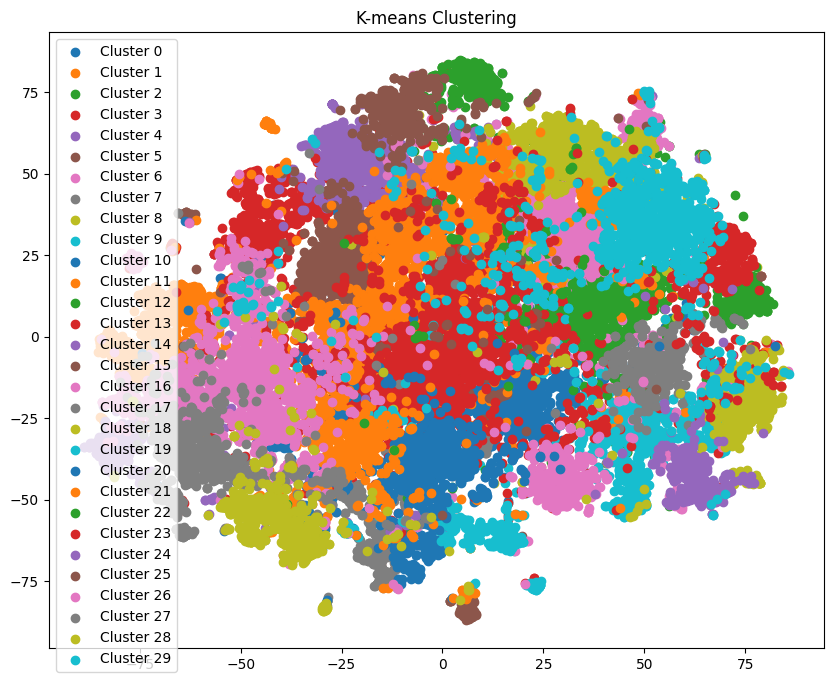

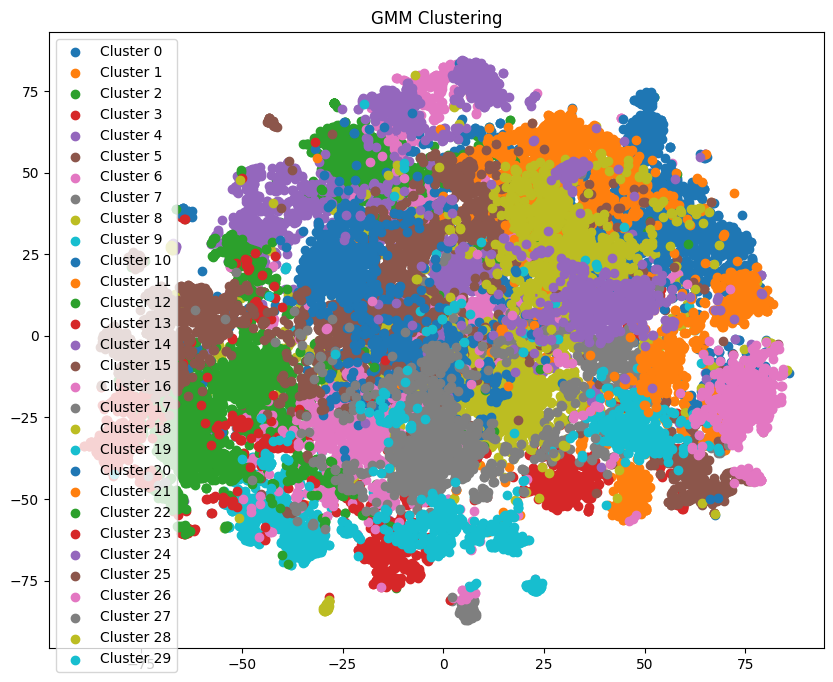

In [105]:
# cluster visualization
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


def visualize_clusters(embeddings_reduced, clusters, title):
    # Reduce dimensionality to 2 dimensions
    embeddings_2d = TSNE(n_components=2).fit_transform(embeddings_reduced)
    # Plot each cluster
    plt.figure(figsize=(10, 8))
    for cluster in range(max(clusters) + 1):
        plt.scatter(embeddings_2d[clusters == cluster, 0], embeddings_2d[clusters == cluster, 1], label=f'Cluster {cluster}')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize K-means clusters
visualize_clusters(embeddings_reduced, clusters_kmeans, 'K-means Clustering')

# Visualize GMM clusters
visualize_clusters(embeddings_reduced, clusters_gmm, 'GMM Clustering')

